# The Brain class

The Colliseum class is in charged of 

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image
%matplotlib qt

import sys
sys.path.insert(0, "..")  # Adds higher directory to python modules path.

from traphing.data_classes import Velas, Portfolio
from traphing import Brain
from traphing.strategies import Trade, Coliseum
from traphing.strategies.entry import EntryStrategy, CrossingMovingAverages
from traphing.strategies.exit import ExitStrategy, StopLoss

from traphing.utils import Timeframes, unwrap
import traphing.utils  as ul

from traphing.graph.Gl import gl

folder_images = "./images/python_generated/strategies/"

## Setting up a portfolio

Strategies work on porfolio objects, they are part of them.


In [2]:
symbol_names_list = ["AUDCHF", "AUDCAD"]
timeframes_list = [Timeframes.M15, Timeframes.D1]
portfolio_name = "my_portfolio"

storage_folder = "../tests/data/storage/"

portfolio = Portfolio(portfolio_name, symbol_names_list, timeframes_list)
portfolio.load_data_from_csv(storage_folder)

start_time = dt.datetime(2019,7,20); end_time = dt.datetime(2019,7,25)
portfolio.set_time_interval(start_time,end_time)

Size ../tests/data/storage/M15/AUDCHF_M15.csv:  100400  rows
Size ../tests/data/storage/D1/AUDCHF_D1.csv:  4894  rows
Size ../tests/data/storage/M15/AUDCAD_M15.csv:  99483  rows
Size ../tests/data/storage/D1/AUDCAD_D1.csv:  4963  rows


## Create a Coliseum object with two entry trading strategies

In [3]:
timeframe = timeframes_list[0]
symbol_name = symbol_names_list[0]
entry_strategy1 = CrossingMovingAverages("CMA_%s_%s"%(symbol_name,timeframe.name), portfolio)
slow_MA_params = {"symbol_name":symbol_name,"timeframe": timeframe,"indicator_name":"SMA", "args": {"n":45}}
fast_MA_params = {"symbol_name":symbol_name,"timeframe": timeframe,"indicator_name":"SMA", "args":{"n":20}}
entry_strategy1.set_params({"fast_MA": fast_MA_params, "slow_MA": slow_MA_params})

# Second entry strategy
timeframe = timeframes_list[0]
symbol_name = symbol_names_list[1]
entry_strategy2 = CrossingMovingAverages("CMA_%s_%s"%(symbol_name,timeframe.name), portfolio)
slow_MA_params = {"symbol_name":symbol_name,"timeframe": timeframe,"indicator_name":"SMA", "args": {"n":45}}
fast_MA_params = {"symbol_name":symbol_name,"timeframe": timeframe,"indicator_name":"SMA", "args":{"n":20}}
entry_strategy2.set_params({"fast_MA": fast_MA_params, "slow_MA": slow_MA_params})

coliseum = Coliseum()
coliseum.add_entry_strategy(entry_strategy1)
coliseum.add_entry_strategy(entry_strategy2)

# The Brain Class

The Coliseum Class contains all the Entry and Exit strategies.

In [4]:
brain = Brain(coliseum, portfolio)

In [5]:
brain.coliseum.compute_requests_queue().qsize()

15

## Backtest Analysis


In [6]:
from traphing import BacktestAnalysis
backtest_analysis = BacktestAnalysis(brain)
trade_analysis_df = backtest_analysis.backtest()

#backtest_analysis.print_summary()
#backtest_analysis.print_gains()

----- Performing Backtesting ---------
Total number of entry trade requests:  30
 Handling request: 1. Requests left: 29. Name: CMA_AUDCAD_M15#10
 Handling request: 2. Requests left: 28. Name: CMA_AUDCAD_M15#0
 Handling request: 3. Requests left: 27. Name: CMA_AUDCAD_M15#11
 Handling request: 4. Requests left: 27. Name: CMA_AUDCAD_M15#1
 Handling request: 5. Requests left: 27. Name: CMA_AUDCHF_M15#5
 Handling request: 6. Requests left: 26. Name: CMA_AUDCHF_M15#0
 Handling request: 7. Requests left: 25. Name: CMA_AUDCAD_M15#2
 Handling request: 8. Requests left: 24. Name: CMA_AUDCAD_M15#12
 Handling request: 9. Requests left: 23. Name: CMA_AUDCHF_M15#6
 Handling request: 10. Requests left: 23. Name: CMA_AUDCHF_M15#1
 Handling request: 11. Requests left: 23. Name: StopLoss_for_trade_CMA_AUDCAD_M15#1#0
 Handling request: 12. Requests left: 22. Name: StopLoss_for_trade_CMA_AUDCAD_M15#11#0
 Handling request: 13. Requests left: 21. Name: CMA_AUDCAD_M15#3
 Handling request: 14. Requests left:

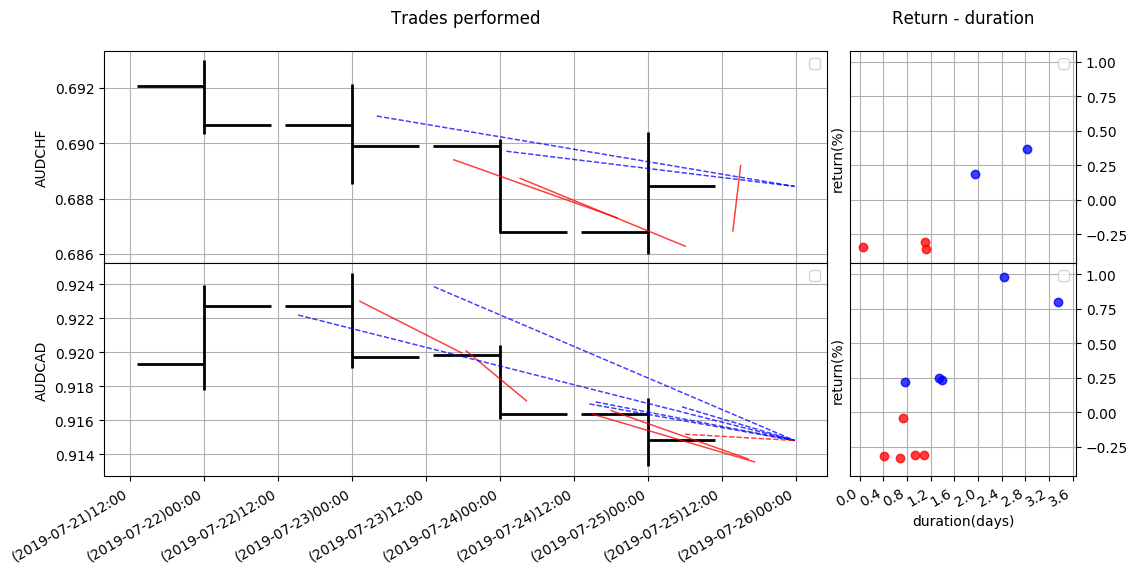

In [7]:
image_name = "backtest_strategies.png"; img_path = folder_images + image_name

symbol_names_list_plot = symbol_names_list
size_inches = [12, 5]
gl.init_figure()
n_rows, n_cols = len(symbol_names_list_plot),4

axes_list = [[],[]]
ax1, ax2 = None, None

for i in range (n_rows):
    ax1 = gl.subplot2grid((n_rows, n_cols),(i,0), sharex = ax1, colspan = n_cols-1)
    ax2 = gl.subplot2grid((n_rows, n_cols),(i,n_cols-1), sharex = ax2, sharey = ax2)
    ax2.yaxis.tick_right()
    
    symbol_name = symbol_names_list_plot[i]
    velas = portfolio[symbol_name][Timeframes.D1]
    
    velas.plot_barchart(axes = ax1, labels = ["Trades performed","",symbol_name], color = "k", lw = 2)
    backtest_analysis.plot_trades(ax1, symbol_name)
    
    backtest_analysis.plot_return_duration_scatter(ax2, symbol_name)
    axes_list[0].append(ax1); axes_list[1].append(ax2)

gl.subplots_adjust(left=.09, bottom=.10, right=.90, top=.95, wspace=.10, hspace=0, hide_xaxis = True, axes_by_columns = axes_list)
gl.save_figure(img_path, dpi = 100, size_inches = size_inches, close = True)
Image(img_path)